Trying out midterm data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import warnings

In [2]:
df = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\column_2C_weka.csv")

In [3]:
df.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
56,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,Abnormal
141,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,Abnormal
92,85.352315,15.844910,71.668660,69.507405,124.419787,76.020603,Abnormal
57,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,Abnormal
201,67.513053,33.275590,96.283062,34.237463,145.601033,88.301486,Abnormal


In [4]:
df.columns = ['pelvic_incidence', 'pelvic_tilt_numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']

In [5]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,NaN,NaN,NaN,60.496653,17.23652,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt_numeric,310.0,NaN,NaN,NaN,17.542822,10.00833,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,NaN,NaN,NaN,51.93093,18.554064,14.0,37.0,49.562398,63.0,125.742385
sacral_slope,310.0,NaN,NaN,NaN,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,NaN,NaN,NaN,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,NaN,NaN,NaN,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
class,310,2,Abnormal,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN


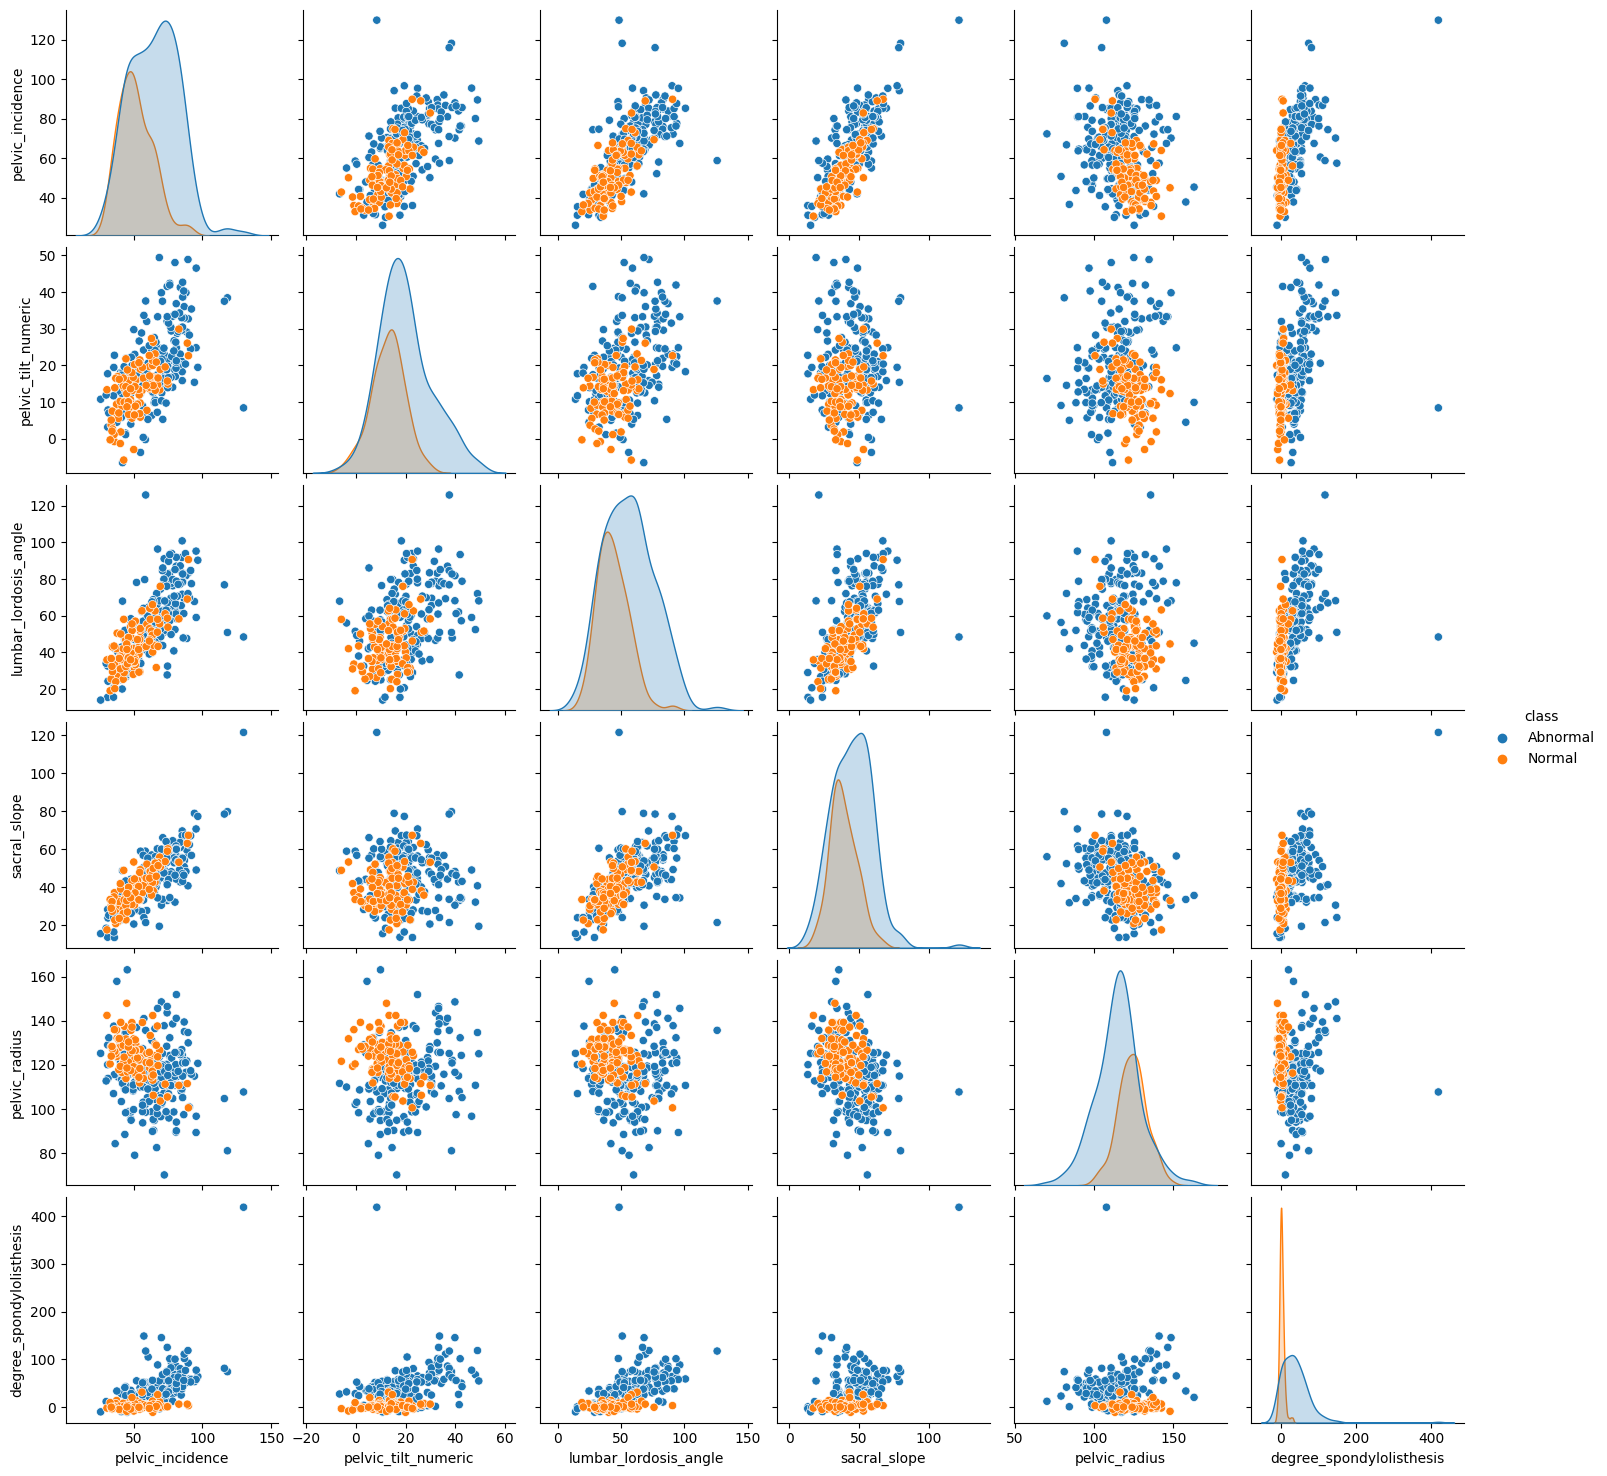

In [6]:
sns.pairplot(df,hue='class')

In [7]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt_numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [8]:
df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [9]:
df['class'] = df['class'].map({'Abnormal':1, 'Normal':0})

In [10]:
dc = pd.DataFrame(df['class'].value_counts())

In [40]:
df.dropna(inplace=True)

In [39]:
df.groupby('class').count()

,degree_spondylolisthesis,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius
class,,,,,,
0,100,100,100,100,100,100
1,206,206,206,206,206,206


In [11]:
dc

,count
class,
1,210
0,100


In [12]:
20600/306

67.3202614379085

In [13]:
df.drop(df[df['degree_spondylolisthesis']>300].index,axis=0,inplace=True)
df.drop(df[df['sacral_slope']>100].index,axis=0,inplace=True)
df.drop(df[df['pelvic_incidence']>110].index,axis=0,inplace=True)
df.drop(df[df['lumbar_lordosis_angle']>120].index,axis=0,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          306 non-null    float64
 1   pelvic_tilt_numeric       306 non-null    float64
 2   lumbar_lordosis_angle     306 non-null    float64
 3   sacral_slope              306 non-null    float64
 4   pelvic_radius             306 non-null    float64
 5   degree_spondylolisthesis  306 non-null    float64
 6   class                     306 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 19.1 KB


change of data type using astype

<Axes: xlabel='class', ylabel='sacral_slope'>

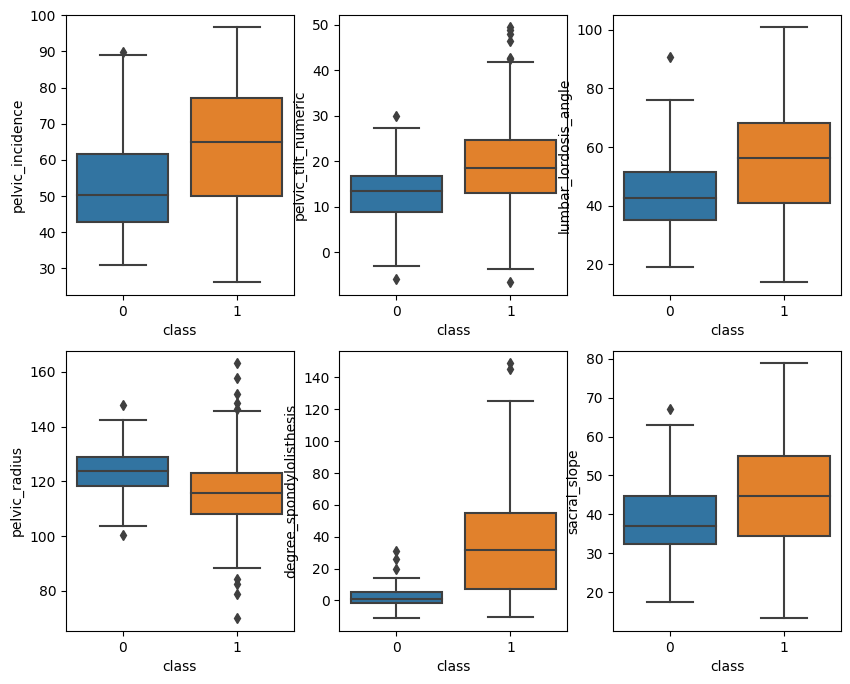

In [15]:
fig, ((ax1, ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(2,3, figsize=(10,8))

sns.boxplot(x='class',y='pelvic_incidence', data=df, ax=ax1)
sns.boxplot(x='class',y='pelvic_tilt_numeric', data=df, ax=ax2)
sns.boxplot(x='class',y='lumbar_lordosis_angle', data=df, ax=ax3)
sns.boxplot(x='class',y='pelvic_radius', data=df, ax=ax4)
sns.boxplot(x='class',y='degree_spondylolisthesis', data=df, ax=ax5)
sns.boxplot(x='class',y='sacral_slope', data=df, ax=ax6)

In [16]:
dc = df.corr()
# dc = dc[(dc['price']>=0.3) & (dc['price']<=-0.3) ]
dc['class'].sort_values(ascending=False).index

Index(['class', 'degree_spondylolisthesis', 'pelvic_incidence',
       'pelvic_tilt_numeric', 'lumbar_lordosis_angle', 'sacral_slope',
       'pelvic_radius'],
      dtype='object')

<Axes: >

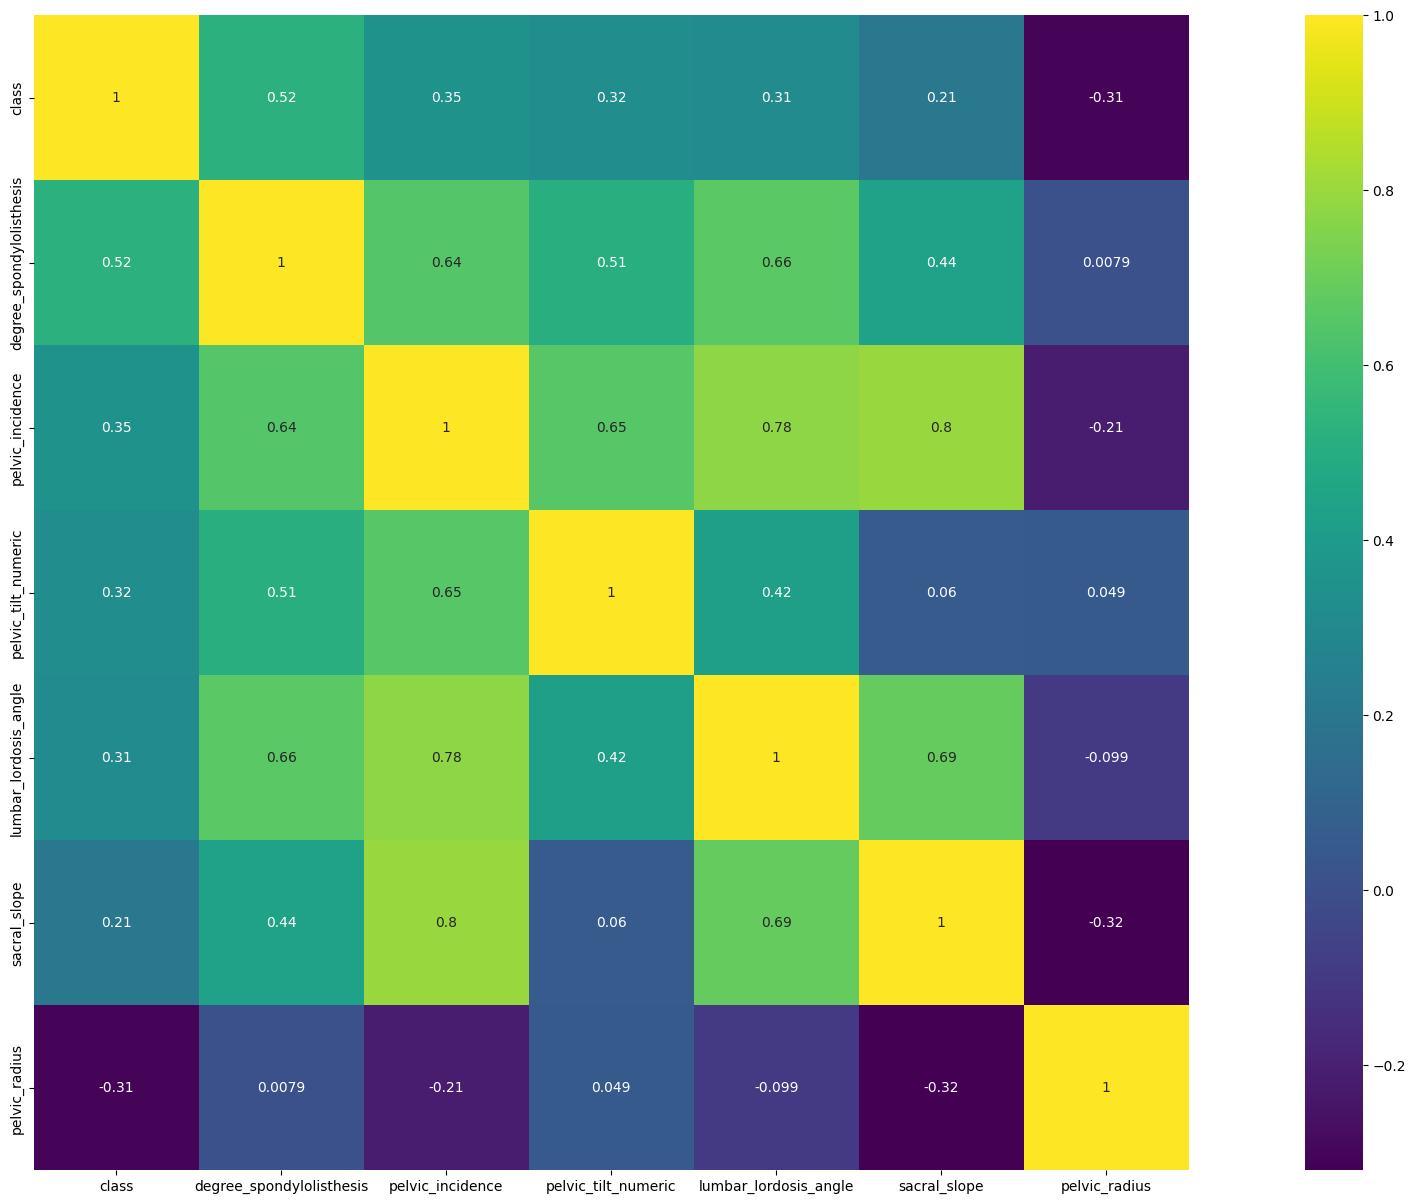

In [43]:
 
df=df[['class', 'degree_spondylolisthesis', 'pelvic_incidence',
       'pelvic_tilt_numeric', 'lumbar_lordosis_angle', 'sacral_slope',
       'pelvic_radius']]
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(),annot=True,cmap='viridis', square=True)

one hot encoding

In [18]:
df.columns

Index(['class', 'degree_spondylolisthesis', 'pelvic_incidence',
       'pelvic_tilt_numeric', 'lumbar_lordosis_angle', 'sacral_slope',
       'pelvic_radius'],
      dtype='object')

In [19]:
# splitting cat & num
cat_columns = []
num_columns = ['degree_spondylolisthesis', 'pelvic_incidence',
       'pelvic_tilt_numeric', 'lumbar_lordosis_angle', 'sacral_slope',
       'pelvic_radius']
target = 'class'

cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

x_train, x_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.4, random_state=42)

In [20]:
x_train.shape

(183, 6)

In [21]:
x_test.shape

(123, 6)

both have 6 columns each so the shape is good.

In [22]:
y_train.shape

(183,)

In [23]:
y_test.shape

(123,)

### modelling 

In [24]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=10)
tree = DecisionTreeClassifier(random_state=123)
svc = SVC(kernel='linear')
models = (log,nb,knn,tree,svc)

In [25]:
warnings.filterwarnings("ignore")

In [26]:
log.fit(x_train,y_train)
nb.fit(x_train,y_train)
knn.fit(x_train,y_train)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

In [27]:
yhat_log = log.predict_proba(x_test)
yhat_nb = nb.predict_proba(x_test)
yhat_knn = knn.predict_proba(x_test)
yhat_tree = tree.predict_proba(x_test)

In [28]:
yhat_knn = knn.predict_proba(x_test)

knn doesnt support probability predict 

In [29]:
y_pred_log = log.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_tree = tree.predict(x_test)

In [30]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, yhat_log[:,1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, yhat_nb[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn) # * 
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, yhat_tree[:,1])

ROC curve overlap

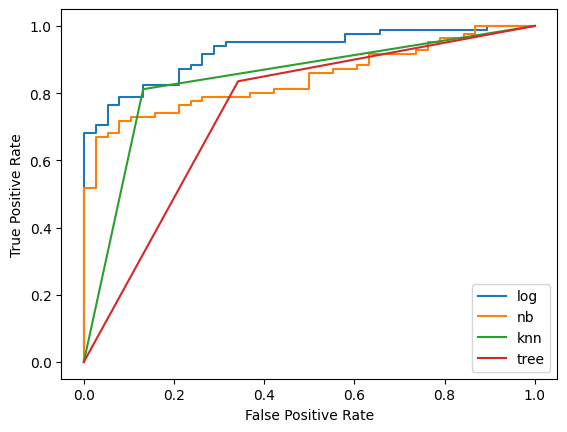

In [31]:
plt.plot(fpr_log,tpr_log, label='log')
plt.plot(fpr_nb,tpr_nb, label='nb')
plt.plot(fpr_knn,tpr_knn, label='knn')
plt.plot(fpr_tree,tpr_tree, label='tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [32]:
metrics = pd.DataFrame(index = ['accuracy','precision', 'recall'], columns =['logisticReg','NaiveBayes','KNN','Tree'])

In [33]:
metrics.loc['accuracy','logisticReg'] = accuracy_score(y_pred=y_pred_log,y_true=y_test)
metrics.loc['precision','logisticReg'] = precision_score(y_pred=y_pred_log,y_true=y_test)
metrics.loc['recall','logisticReg'] = recall_score(y_pred=y_pred_log,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_log,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_log))

[[30  8]
 [11 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        38
           1       0.90      0.87      0.89        85

    accuracy                           0.85       123
   macro avg       0.82      0.83      0.82       123
weighted avg       0.85      0.85      0.85       123



In [34]:
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_nb,y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_nb,y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_nb,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_nb,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_nb))

[[30  8]
 [21 64]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.79      0.67        38
           1       0.89      0.75      0.82        85

    accuracy                           0.76       123
   macro avg       0.74      0.77      0.74       123
weighted avg       0.80      0.76      0.77       123



In [35]:
metrics.loc['accuracy','KNN'] = accuracy_score(y_pred=y_pred_knn,y_true=y_test)
metrics.loc['precision','KNN'] = precision_score(y_pred=y_pred_knn,y_true=y_test)
metrics.loc['recall','KNN'] = recall_score(y_pred=y_pred_knn,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_knn,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_knn))

[[33  5]
 [16 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.87      0.76        38
           1       0.93      0.81      0.87        85

    accuracy                           0.83       123
   macro avg       0.80      0.84      0.81       123
weighted avg       0.85      0.83      0.83       123



In [36]:
metrics.loc['accuracy','Tree'] = accuracy_score(y_pred=y_pred_tree,y_true=y_test)
metrics.loc['precision','Tree'] = precision_score(y_pred=y_pred_tree,y_true=y_test)
metrics.loc['recall','Tree'] = recall_score(y_pred=y_pred_tree,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_tree,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_tree))

[[25 13]
 [14 71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        38
           1       0.85      0.84      0.84        85

    accuracy                           0.78       123
   macro avg       0.74      0.75      0.74       123
weighted avg       0.78      0.78      0.78       123



In [37]:
confusion_matrix(y_pred=,y_true=)

SyntaxError: invalid syntax (92223152.py, line 1)

In [ ]:
100*metrics

,logisticReg,NaiveBayes,KNN,Tree
accuracy,84.552846,76.422764,82.926829,78.04878
precision,90.243902,88.888889,93.243243,84.52381
recall,87.058824,75.294118,81.176471,83.529412


In [ ]:
print(f1_score(y_pred_knn,y_test))
print(f1_score(y_pred_log,y_test))
print(f1_score(y_pred_nb,y_test))
print(f1_score(y_pred_tree,y_test))

0.8679245283018868
0.8862275449101796
0.8152866242038216
0.8402366863905326


In [ ]:
plt.figure(figsize=(20,20))
plot_tree(tree, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X.columns)

NameError: name 'X' is not defined

<Figure size 2000x2000 with 0 Axes>

Cross validation 

In [ ]:
cv_scores = cross_val_score(log, X, y, cv=5)
print(cv_scores)
cv_scores.mean()

NameError: name 'X' is not defined

hyper parameter testing

In [ ]:
# params knn
params_knn = {'n_neighbors': list(range(1,20)), 'weights': ['uniform', 'distance'], 'metric': ['l1', 'euclidean', 'manhattan', 'sokalsneath', 'hamming', 'sokalmichener', 'rogerstanimoto', 'braycurtis', 'dice', 'jaccard', 'pyfunc', 'haversine', 'matching', 'cityblock', 'correlation', 'l2', 'nan_euclidean', 'chebyshev', 'p', 'wminkowski', 'minkowski', 'cosine', 'infinity', 'russellrao', 'seuclidean', 'canberra', 'kulsinski', 'sqeuclidean', 'yule', 'mahalanobis'] }
params_log = {'C': [0.01, 0.1, 1.0, 10.0],'solver': ['lbfgs', 'liblinear']}
params_svc = {'kernel':['rbf', 'linear', 'poly','sigmoid']}
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter=100, scoring='accuracy')
gridsearch_knn = GridSearchCV(knn, params_knn, cv=10, scoring='roc_auc')

gridsearch_knn.fit(x_train, y_train)
randomsearch_knn.fit(x_train, y_train)

print("Best parameters from GridSearc: ", gridsearch_knn.best_params_)
print("Best parameters from RandomSearch: ", randomsearch_knn.best_params_)

Best parameters from GridSearc:  {'metric': 'canberra', 'n_neighbors': 13, 'weights': 'uniform'}
Best parameters from RandomSearch:  {'weights': 'distance', 'n_neighbors': 14, 'metric': 'sqeuclidean'}


In [ ]:
knn_grid = GridSearchCV(knn, param_grid=knn_params, cv=5)
knn_grid.fit(x_train, y_train)
best_knn_model = knn_grid.best_estimator_
yhat_knn = best_knn_model.predict_proba(x_test)
y_pred_knn = best_knn_model.predict(x_test)

NameError: name 'knn_params' is not defined

In [ ]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
cv_scores_knn = cross_val_score(knn_best, x_train, y_train, cv=5, scoring='accuracy')
knn_best.fit(x_train, y_train)
y_pred_knn = knn_best.predict(x_test)


In [ ]:
print(cv_scores_knn)
print("\nK-Nearest Neighbors Metrics: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

logistec is best . DOing hyper parameter tuning based off it.